<a href="https://colab.research.google.com/github/tbazzi/Data-Science---Fullstack-Bootcamp/blob/master/S7_1_Manipulations_de_Tenseurs_sur_TF_2_SOLUTIONS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Manipulations de Tenseurs sur TF 2.0

Avant de commencer à créer des réseaux de neurones complexes, il est bon d'avoir des fondements solides sur la manipulations de tenseurs sur TensorFlow. Ce notebook s'inspire de celui créé par [Google sur TF 1.X ](https://colab.research.google.com/notebooks/mlcc/creating_and_manipulating_tensors.ipynb?utm_source=mlcc&utm_campaign=colab-external&utm_medium=referral&utm_content=tensors-colab&hl=en) que vous pouvez aller regarder pour connaître les différences entre la version 1 et 2 de TensorFlow. 

* Installez et importez Tensorflow 2.0

In [0]:
!pip install tensorflow-gpu==2.0.0beta1
import tensorflow as tf

In [0]:
tf.__version__

'2.0.0-beta1'

* Créez deux tensors `t1` & `t2` qui seront deux constantes ---> [`constante`](https://www.tensorflow.org/api_docs/python/tf/constant)
Celles-ci vaudront respectivement : `[[12, 34], [56, 78]]` & `[[910, 1112], [1314, 1516]]`

In [0]:
t1 = tf.constant([
    [12, 34],
    [56, 78]
])

t2 = tf.constant([
    [910, 1112],
    [1314, 1516]
])

* Ajoutez un nombre scalaire 5 à `t1`

In [0]:
t1 + 5

<tf.Tensor: id=81, shape=(2, 2), dtype=int32, numpy=
array([[17, 39],
       [61, 83]], dtype=int32)>

* Est-ce équivalent à faire `t1 + [[5,5], [5,5]]` ?

In [0]:
t1 + [[5,5], [5,5]]

<tf.Tensor: id=84, shape=(2, 2), dtype=int32, numpy=
array([[17, 39],
       [61, 83]], dtype=int32)>

----> Ce concept s'appelle le [`broadcasting`](https://www.tensorflow.org/xla/broadcasting)

* A chaque fois que nous calculons des tenseurs entre eux, notre console retourne un tenseur avec : 
  * Sa valeur 
  * un ID 
  * une shape 
  * un type 
  
Utilisez `.numpy()` pour retourner uniquement la valeur du tenseur `t1`

In [0]:
t1.numpy()

array([[12, 34],
       [56, 78]], dtype=int32)

* Ajoutez à `t2` une matrice composée uniquement de 1. 

BONUS : Faites le sans créer une matrice à la main 

In [0]:
t2 + tf.ones_like(t2)

<tf.Tensor: id=90, shape=(2, 2), dtype=int32, numpy=
array([[ 911, 1113],
       [1315, 1517]], dtype=int32)>

* Faisons maitenant une multiplication de matrices. Créez un tenseur `t3` qui sera une multiplication matricielle de `t1` et de `t2`. Pour rappelle, regardez comment se fait une multiplication matricielle ici : [`Algèbre Linéaire`](https://github.com/JedhaBootcamp/FULL_STACK_12_WEEK_PROGRAM/tree/master/S0.2%20--%20Data%20Visualisation%20%26%20R%C3%A9visions%20Statistiques/S2-4%20--%20Alg%C3%A8ble%20Lin%C3%A9aire%20%26%20Probabilit%C3%A9s/S2-4A)

In [0]:
t3 = tf.matmul(t1, t2)
t3

<tf.Tensor: id=92, shape=(2, 2), dtype=int32, numpy=
array([[ 55596,  64888],
       [153452, 180520]], dtype=int32)>

In [0]:
t1 @ t2

<tf.Tensor: id=94, shape=(2, 2), dtype=int32, numpy=
array([[ 55596,  64888],
       [153452, 180520]], dtype=int32)>

* Un concept qu'il est bon de maîtriser est celui de `reshape`. En effet, on aura souvent l'occasion de manipuler des tenseurs et de changer leur forme. On pourra utiliser la méthode [`.reshape()`](https://www.tensorflow.org/api_docs/python/tf/reshape)

  * En utilisant `reshape`, changer la forme de `t1` pour qu'il ressemble à un vecteur 

In [0]:
tf.reshape(t1, [-1,])

<tf.Tensor: id=106, shape=(4,), dtype=int32, numpy=array([12, 34, 56, 78], dtype=int32)>

NB : Notez que vous pouvez faire deviner la _shape_ d'un tenseur en mettant la valeur `-1`. Ceci est extremement pratique pour vous éviter des calculs rébarbatifs. Attention cependant, ce `-1` ne peut se mettre que sur 1 dimension de votre `shape`.

* De manière générale, les tenseurs ont la forme suivante : 
  * `(batch_size, height, width, channels)`
  * Regardez la taille de `t3` initiale 
  * Pour la prochaine question nous considérerons que `t3` suit cette dimension (height, width)
  *  Redimensionnez `t3` pour qu'il suive la dimension (batch_size, height, width, channels)

In [0]:
t3.shape

TensorShape([2, 2])

In [0]:
t3 = tf.reshape(t3, (1, 2, 2, 1))
t3

<tf.Tensor: id=109, shape=(1, 2, 2, 1), dtype=int32, numpy=
array([[[[ 55596],
         [ 64888]],

        [[153452],
         [180520]]]], dtype=int32)>

* Nous avons maintenant un tenseur qui serait compatible pour un modèle. Ceci voudrait dire que nous avons une image de hauteur 2 pixels et de largeur 2 pixels. Ce n'est pas énorme. Considérons un nouveau tenseur, appliquez le code suivant : 

```
(train_img, _), (_,_) = tf.keras.datasets.cifar10.load_data()
img = train_img[0]
img = img.reshape(1, 32, 32, 3) 
```

  * Regardez le rang de votre matrice `img` ----> cf. [`Documentation`](https://www.tensorflow.org/api_docs/python/tf/rank)

In [0]:
(train_img, _), (_,_) = tf.keras.datasets.cifar10.load_data()
img = train_img[0]
img = img.reshape(1, 32, 32, 3) 


tf.rank(img).numpy()

4

* Nous avons une matrice de rang 4, cela veut dire que nous avons 4 dimensions dans notre tenseur. Essayons de visualiser notre image ! 
  * Importez matplotlib.pyplot 
  * Utilisez `imshow` pour tenter de visualiser l'image 

In [0]:
import matplotlib.pyplot as plt 

TypeError: ignored

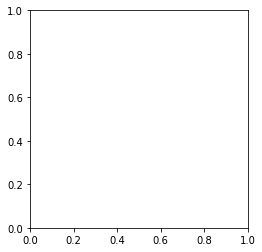

In [0]:
plt.imshow(img)

* Il semblerait que nous ayons une erreur. En effet `imshow` ne prend que des tenseurs de rang 3 ! 
  * Utilisez [`tf.squeeze()`](https://www.tensorflow.org/api_docs/python/tf/squeeze) pour réduire la dimensionnalité de votre tenseur 

In [0]:
img_squeezed = tf.squeeze(img)
print("New shape : {}".format(img_squeezed.shape))

New shape : (32, 32, 3)


* Tentez de visualiser votre image à nouveau 

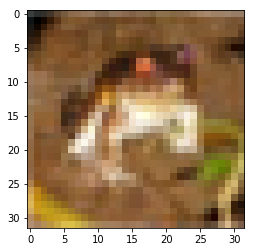

In [0]:
plt.imshow(img_squeezed)

In [0]:
img_squeezed

<tf.Tensor: id=26, shape=(32, 32, 3), dtype=uint8, numpy=
array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 18

----> Fonctionne beaucoup mieux ! 

Il nous reste à parler d'un dernier concept, celui de `tf.Variable`. Les variables ressemblent énormément aux tenseurs `tf.constant`. Le but du premier étant d'avoir des valeurs à l'intérieur du tenseur qui sont modifiables et sur lesquelles on peut faire des opérations. Le second sont plutôt sensé être des valeurs constantes sur lesquelles nous ne faisons pas d'opérations. 

Pour plus d'informations, n'hésitez pas à regarder ce [Stack Overflow](https://stackoverflow.com/questions/44745855/tensorflow-variables-and-constants)

Dans la pratique, la vraie différence que vous verrez en termes de code entre `tf.constant` & `tf.variable` est le fait que vous aurez des attributs d'opérations sur `tf.variable`

* Créez deux variables `t4` & `t5` qui sont deux matrices de nombre aléatoires (vous pouvez les choisir arbitrairement)

In [0]:
t4 = tf.Variable([
    [1, 2], 
    [3, 4]
])

t5 = tf.Variable([
    [7, 8],
    [9, 10]
])


print("T4: {}".format(t4))
print("T5: {}".format(t5))

T4: <tf.Variable 'Variable:0' shape=(2, 2) dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>
T5: <tf.Variable 'Variable:0' shape=(2, 2) dtype=int32, numpy=
array([[ 7,  8],
       [ 9, 10]], dtype=int32)>


* Utilisez `assign_add()` pour ajouter `t1` à `t4`

In [0]:
t4.assign_add(t1)

<tf.Variable 'UnreadVariable' shape=(2, 2) dtype=int32, numpy=
array([[13, 36],
       [59, 82]], dtype=int32)>

* Tentez de faire l'inverse --> `assign_add()` de `t4` sur `t1`

In [0]:
t1.assign_add(t4)

AttributeError: ignored

---> Voici donc la différence entre des `tf.Constant` et des `tf.Variable`

Vous pouvez voir tous les opérateurs possibles sur des variables sur cette documentation : 

[`variables`](https://www.tensorflow.org/api_docs/python/tf/Variable)

* Finissons sur quelque chose d'un peu plus complexe. 
  * Modélisez 10 lancés de deux dés et stockez les deux tenseurs 
  * Créez une troisième variables qui sera la somme des valeurs de chacun des lancés des deux dés
  * Enfin, stockez les trois valeurs (lancé du dé 1, lancé du dé 2, somme des deux lancés) dans une matrice
  
Pour se faire, vous pourrez vous aider de : 

* [random.uniform](https://www.tensorflow.org/api_docs/python/tf/random/uniform)
* [concat](https://www.tensorflow.org/api_docs/python/tf/concat)

In [0]:
die1 = tf.random.uniform([10, 1], minval=1, maxval=7, dtype=tf.int32)
die2 = tf.random.uniform([10, 1], minval=1, maxval=7, dtype=tf.int32)

dice_sum = tf.add(die1, die2)
resulting_matrix = tf.concat(values=[die1, die2, dice_sum], axis=1)

print(resulting_matrix.numpy())

[[ 2  6  8]
 [ 6  3  9]
 [ 2  3  5]
 [ 4  6 10]
 [ 5  6 11]
 [ 5  3  8]
 [ 6  4 10]
 [ 4  3  7]
 [ 3  2  5]
 [ 2  5  7]]
